* 회귀 Regression
- : 여러 변수들 간의 상관 관계를 파악하여 어떤 특징 변수의 값을 다른 변수들의 값을 이용하여 설명, 예측하는 수리식을 찾는 방법

* 회귀 분석의 유형
1. 변수의 개수 및 계수의 형태에 따라 구분한다
2. 독립 션수의 개수에 따라 1개인 경우, 단순회귀분석 / 독립변수가 여러 개인 경우 다중회귀분석
3. 회귀 계수의 형태에 따라 계수를 선형 결합으로 표현할 수 있는 경우 선형, 계수를 선형 결함으로 표현할 수 없는 경우 비선형
4. 종속 변수의 개수에 따라 1개인 경우, 단변량 휘귀모델 / 여러 개인 경우 다변량 회귀 모델

* 선형 회귀란?
- 종속 변수가 독립 변수와 회귀 계수의 선형 조합으로 표현 가능한 경우
- 파라미터(계수)에 대한 선형성만을 가정함
- 독립변수, X와 종속변수, y간의 상호 연관성 정도를 파악하기 위한 분석 기법

---

In [ ]:
# 1. 단순 선형 회귀

##### < 사이킷런에서 최소제곱법으로 단순 선형회귀 수행 >

###### 필요한 모듈 import

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##### 1. 맥주 데이터를 활용한 단순 선형 회귀 실습

In [11]:
# 데이터 수집
beer = pd.read_csv('./data/beer.csv')
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


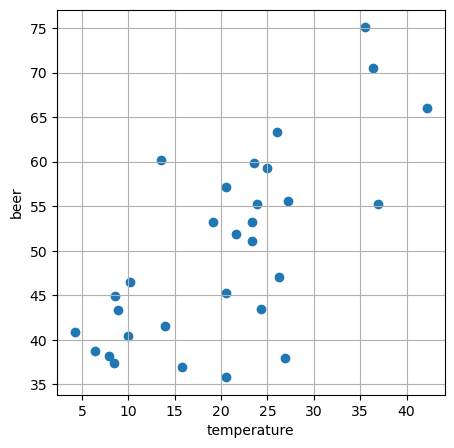

In [12]:
# 데이터 탐색
plt.figure(figsize=(5,5))
plt.scatter(beer.temperature, beer.beer)
plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()
plt.show()

In [13]:
# 독립 변수, 종속 변수 확인
beer.temperature

0     20.5
1     25.0
2     10.0
3     26.9
4     15.8
5      4.2
6     13.5
7     26.0
8     23.3
9      8.5
10    26.2
11    19.1
12    24.3
13    23.3
14     8.4
15    23.5
16    13.9
17    35.5
18    27.2
19    20.5
20    10.2
21    20.5
22    21.6
23     7.9
24    42.2
25    23.9
26    36.9
27     8.9
28    36.4
29     6.4
Name: temperature, dtype: float64

In [15]:
# 종속 변수 확인, 레코드 수 확인
print(beer.beer)
print('레코드 수 : ', len(beer))

0     45.3
1     59.3
2     40.4
3     38.0
4     37.0
5     40.9
6     60.2
7     63.3
8     51.1
9     44.9
10    47.0
11    53.2
12    43.5
13    53.2
14    37.4
15    59.9
16    41.5
17    75.1
18    55.6
19    57.2
20    46.5
21    35.8
22    51.9
23    38.2
24    66.0
25    55.3
26    55.3
27    43.3
28    70.5
29    38.8
Name: beer, dtype: float64
레코드 수 :  30


In [16]:
###  데이터 준비 - 학습용 / 검증용 데이터 분리

# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
import numpy as np

#독립변수, 종속변수 데이터셋 준비
X = np.array(beer.temperature).reshape(-1,1)
y = beer.beer

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [17]:
# 모델 구축

from sklearn.linear_model import LinearRegression

#모델 클래스 선택 후 인스턴스 객체 생성

lr = LinearRegression()


In [18]:
# 학습 수행
reg = lr.fit(X_train, y_train)

In [19]:
# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
reg.coef_, reg.intercept_

(array([0.69705648]), 36.06666541566105)

In [31]:
#회귀식
print(f"y = {np.round(reg.coef_[0], 2)}X + {reg.intercept_:.2f}")

y = 0.7X + 36.07


In [22]:
# 구축된 모델에서 예측 수행
y_pred = reg.predict(X_test)

print(np.round(y_pred, 2))

[60.81 50.36 54.33 50.36 41.92 43.18]


In [51]:
X_test, y_pred, y_test

(array([[35.5],
        [20.5],
        [26.2],
        [20.5],
        [ 8.4],
        [10.2]]),
 array([60.81217046, 50.35632326, 54.32954519, 50.35632326, 41.92193985,
        43.17664151]),
 17    75.1
 21    35.8
 10    47.0
 19    57.2
 14    37.4
 20    46.5
 Name: beer, dtype: float64)

In [46]:
# 모델 성능 평가

from sklearn.metrics import mean_squared_error, r2_score
#MSE
mse = mean_squared_error(y_test, y_pred)

#RMSE
rmse = np.sqrt(mse)  # 종속변수의 단위를 제자리로 돌려놓음

print(f"MSE : {mse:.3f}")
print(f"RMSE : {rmse:.3f}")  # +- 9.5558 만큼 준비하면 되겠구나 예측

MSE : 91.347
RMSE : 9.558


In [25]:
#결정계수 R2
r2 = r2_score(y_test, y_pred)
print("R2 :", np.round(r2, 3))

R2 : 0.485


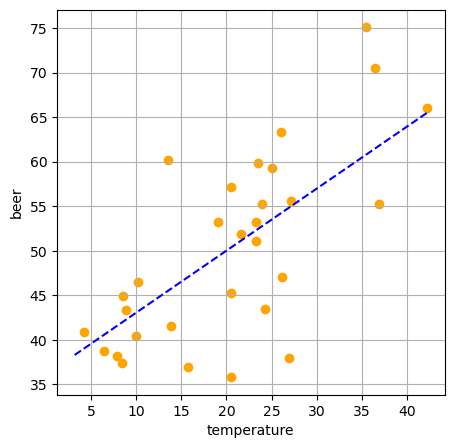

In [58]:
## 시각화

#y = 0.697056X + 36.06 시각화

plt.figure(figsize=(5, 5))
xx = np.arange(beer.temperature.min() - 1, beer.temperature.max() + 1)
yy = reg.predict(xx.reshape(len(xx), 1))

plt.plot(xx, yy, linestyle='--', color = 'blue')

# 수집한 데이터셋 시각화
plt.scatter(beer.temperature, beer.beer, color = 'orange')
plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()
plt.show()


#### 응용1. 나이, 키의 관계를 회귀 분석

In [59]:
# 필요한 모듈 import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [120]:
# 데이터 생성 및 수집

data_df = pd.read_csv('./data/age_height.csv')
data_df.rename(columns = {'age(X)':'age', 'height(T)':'height'}, inplace=True)
data_df

,age,height
0,15.425550,170.910131
1,23.008112,160.675599
2,5.002859,129.002066
3,12.558314,159.701396
4,8.668897,155.460589
5,7.308465,140.561344
6,9.656505,153.654664
7,13.639018,159.429396
8,14.919187,164.704239
9,18.470418,169.645276


In [121]:
# 데이터 분포 시각화

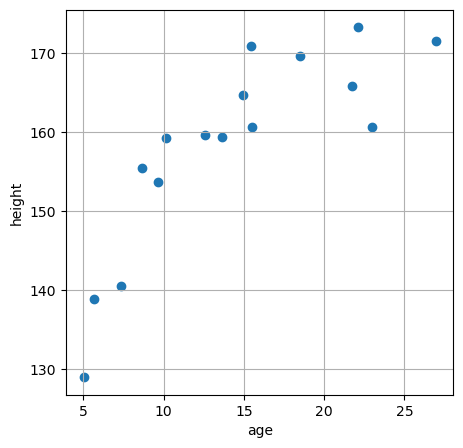

In [122]:
plt.figure(figsize=(5, 5))
plt.scatter(data_df.age, data_df.height)
plt.xlabel('age')
plt.ylabel('height')
plt.grid()
plt.show()

In [123]:
# 데이터 준비

# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
X = np.array(data_df.age).reshape(-1,1)
y = data_df.height

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)


In [124]:
#####모델 구축 및 예측

In [125]:
#모델 객체 생성  및 학습
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

reg = lr.fit(X_train, y_train)

reg.coef_, reg.intercept_


# 예측 수행
y_pred = reg.predict(X_test)
print(np.round(y_pred,2))


[156.85 177.56 158.41 145.98]


In [129]:
#####모델 성능 평가
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
#MSE : metrcics 모듈의 mean_squared_error() 함수 사용
#RMSE : numpy의 sqrt() 함수 사용



# MSE
mse = mean_squared_error(y_test, y_pred)

#RMSE
rmse = np.sqrt(mse)


#결정계수 R2
r2 = r2_score(y_test, y_pred)

#회귀식

print(f"y = {reg.coef_[0]:.2f}X + {reg.intercept_:.2f}")

print(f"mse = {mse:.3f}, rmse = {rmse:.3f}, r2 = {r2:.3f}")

y = 1.44X + 138.78
mse = 83.495, rmse = 9.138, r2 = 0.663


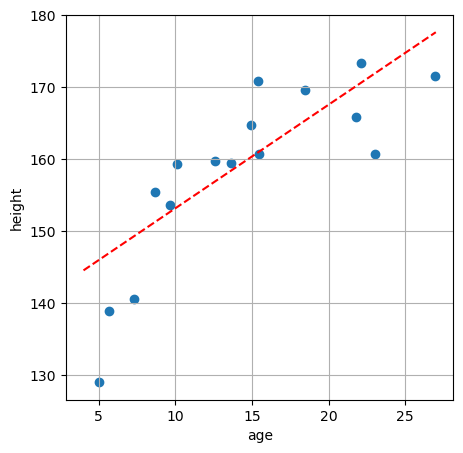

In [107]:
#나이, 키 데이터 실제 데이터 및 회귀식 시각화

#y = 1.44X + 138.78 시각화
plt.figure(figsize=(5, 5))
xx = np.arange(data_df.age.min() - 1, data_df.age.max() + 1)
yy = reg.predict(xx.reshape(-1, 1))

plt.plot(xx, yy, linestyle='--', color = 'red')


plt.scatter(data_df.age, data_df.height)
plt.xlabel('age')
plt.ylabel('height')
plt.grid()
plt.show()



# < 스탯츠모델에서 단순선형회귀 수행>

In [157]:
#스탯츠모델 import
import statsmodels.api as sm

# 맥주 데이터 
# 데이터 생성
beer = pd.read_csv('./data/beer.csv')


#독립변수, 종속변수 데이터셋 준비
X = np.array(beer.temperature).reshape(-1, 1)
y = beer.beer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 상수항 결합
X_train = sm.add_constant(X_train)


In [158]:
# 스탯츠모델
lr = sm.OLS(y_train, X_train)

reg = lr.fit()

In [160]:
# 성능 평가
reg.summary()

# 9.50e-05 = 9.5 * 1/(10**5) 과학적 표기법
# f 통계량(f- statistic) 어마어마하게 작고 신뢰할 만 하다

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     22.63
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           9.50e-05
Time:                        15:56:39   Log-Likelihood:                -79.854
No. Observations:                  24   AIC:                             163.7
Df Residuals:                      22   BIC:                             166.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0667      3.315     10.881      0.000      29.193      42.941
x1             0.6971      0.147      4.757      0.000       0.393       1.001
==============================================================================
Omnibus:                        1.282   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                0.363
Skew:                          -0.241   Prob(JB):                        0.834
Kurtosis:                       3.360   Cond. No.                         52.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 응용2: 농어 무게 예측

In [152]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

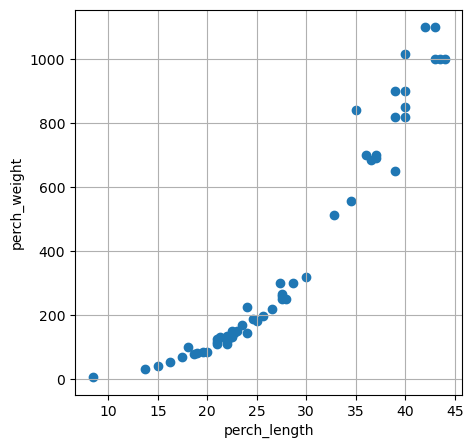

In [153]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
plt.scatter(perch_length, perch_weight)
plt.xlabel('perch_length')
plt.ylabel('perch_weight')
plt.grid()
plt.show()

In [154]:
from sklearn.model_selection import train_test_split

X = perch_length.reshape(-1, 1)
y = pd.Series(perch_weight)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [155]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
reg = lr.fit(X_train, y_train)

# 회귀식
print(f"y = {reg.coef_[0]:.2f}X + {reg.intercept_:.2f}")

# 예측 수행
y_pred = reg.predict(X_test)
y_pred

y = 35.63X + -618.33


array([771.28139764, -83.86515547, 771.28139764, 183.36814237,
       361.52367427, 361.52367427, 450.60144022, 628.75697212,
       806.91250402, 700.01918488, 806.91250402, 190.49436365])

In [156]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f"mse = {mse}, rmse = {rmse}, r2 = {r2}")

mse = 14550.23701560241, rmse = 120.62436327542794, r2 = 0.8803330236667549


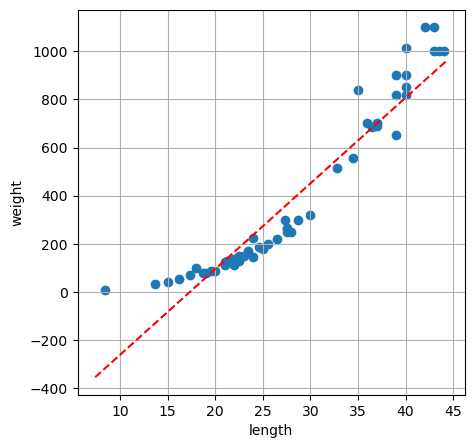

In [135]:
# 실제 데이터 및 회귀식 시각화
# y = 35.63X + -618.33 시각화

plt.figure(figsize=(5, 5))
xx = np.arange(perch_length.min() - 1, perch_length.max() + 1)
yy = reg.predict(xx.reshape(-1, 1))

plt.plot(xx, yy, linestyle='--', color = 'red')


plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.grid()
plt.show()


# 응용3: 보스턴 집값 선형 회귀

### 데이터 수집

In [137]:
boston = pd.read_csv('./data/boston_room_price.csv')
boston

,RM,price
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


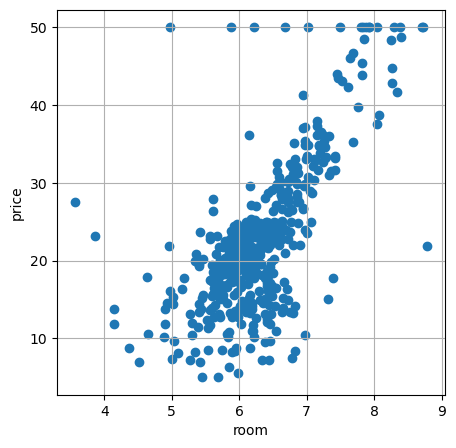

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
plt.scatter(boston.RM, boston.price)
plt.xlabel('room')
plt.ylabel('price')
plt.grid()
plt.show()

In [142]:
from sklearn.model_selection import train_test_split

X = np.array(boston.RM).reshape(-1, 1)
y = boston.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


# 선형 모델 객체 생성
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
reg = lr.fit(X_train, y_train)

# 회귀식 
print(f"y = {reg.coef_[0]:.3f}X + {reg.intercept_:.3f}")

# 예측
y_pred = reg.predict(X_test)

# 평가
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f"mse = {mse:.3f}, rmse = {rmse:.3f}, r2 = {r2:.3f}")

y = 8.461X + -30.571
mse = 36.517, rmse = 6.043, r2 = 0.602


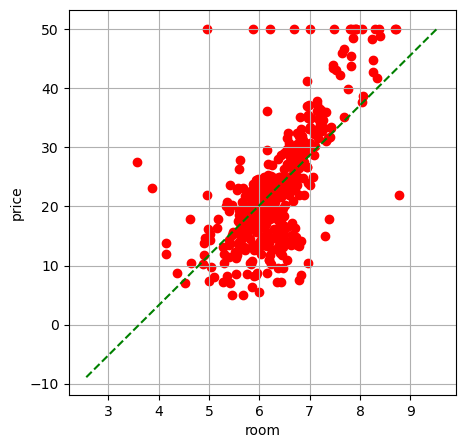

In [146]:
# 시각화
plt.figure(figsize=(5, 5))
xx = np.arange(boston.RM.min() -1, boston.RM.max() + 1)
yy = reg.predict(xx.reshape(-1, 1))

plt.plot(xx, yy, linestyle = '--', color = 'green')

plt.scatter(boston.RM, boston.price, color = 'red')
plt.xlabel('room')
plt.ylabel('price')
plt.grid()
plt.show()

### 데이터 탐색

In [ ]:
dir(boston)

In [ ]:
print(boston.DESCR)

In [ ]:
print(boston.data[:5])

In [ ]:
print(boston.target[:5])

In [ ]:
print(boston.feature_names)

---

In [ ]:
# 2. 다중 회귀 분석

In [9]:
# pip install xlrd

In [36]:
import pandas as pd

boston_df = pd.read_excel('./boston.xls')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [37]:
# 데이터의 크기와 형태 확인
boston_df.shape

(506, 15)

In [38]:
# 데이터프레임 정보
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [39]:
# CHAS 컬럼 처리
boston_df.drop(['CHAS', 'CAT. MEDV'], axis=1, inplace=True)
boston_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [40]:
# MEDB => PRICE 컬렴명 변경
boston_df.rename(columns = {'MEDV':'PRICE'}, inplace=True)
boston_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


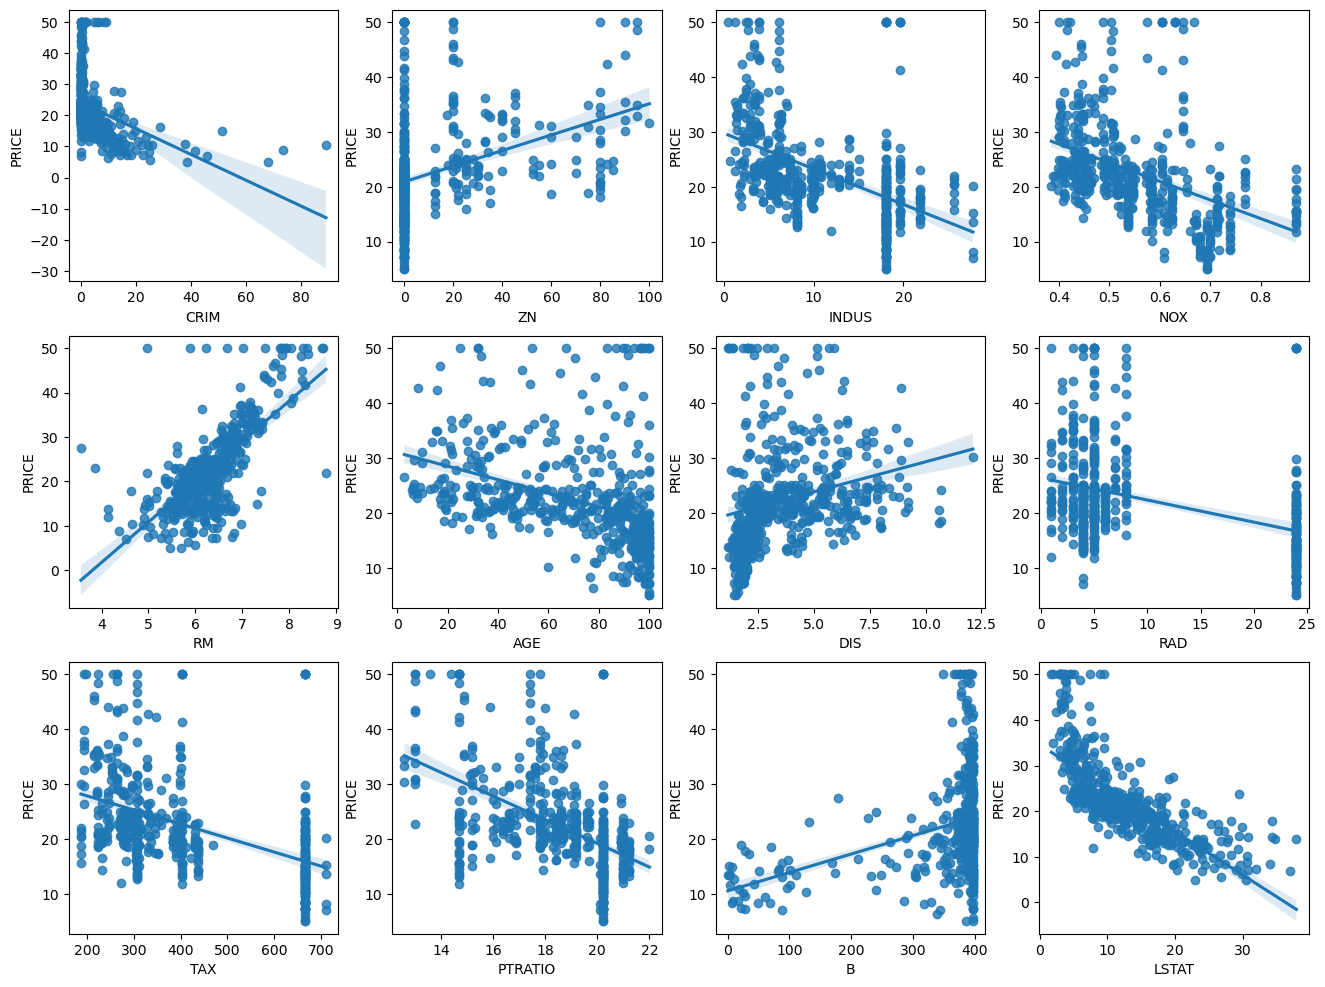

In [41]:
# EDA : 데이터 선정 및 분포 정보 확인

import matplotlib.pyplot as plt
import seaborn as sns

# 3행 4열의 subplots을 준비한다
fig, axs = plt.subplots(figsize=(16, 12), nrows=3, ncols=4)

x_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', \
              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for i, feature in enumerate(x_features):
    # 현재 subplot의 행 열 번호 갱신
    row = int(i/4)
    col = i%4
    # 산점도와 회귀선 시각화
    sns.regplot(x=feature, y="PRICE", data=boston_df, ax=axs[row][col])

c:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


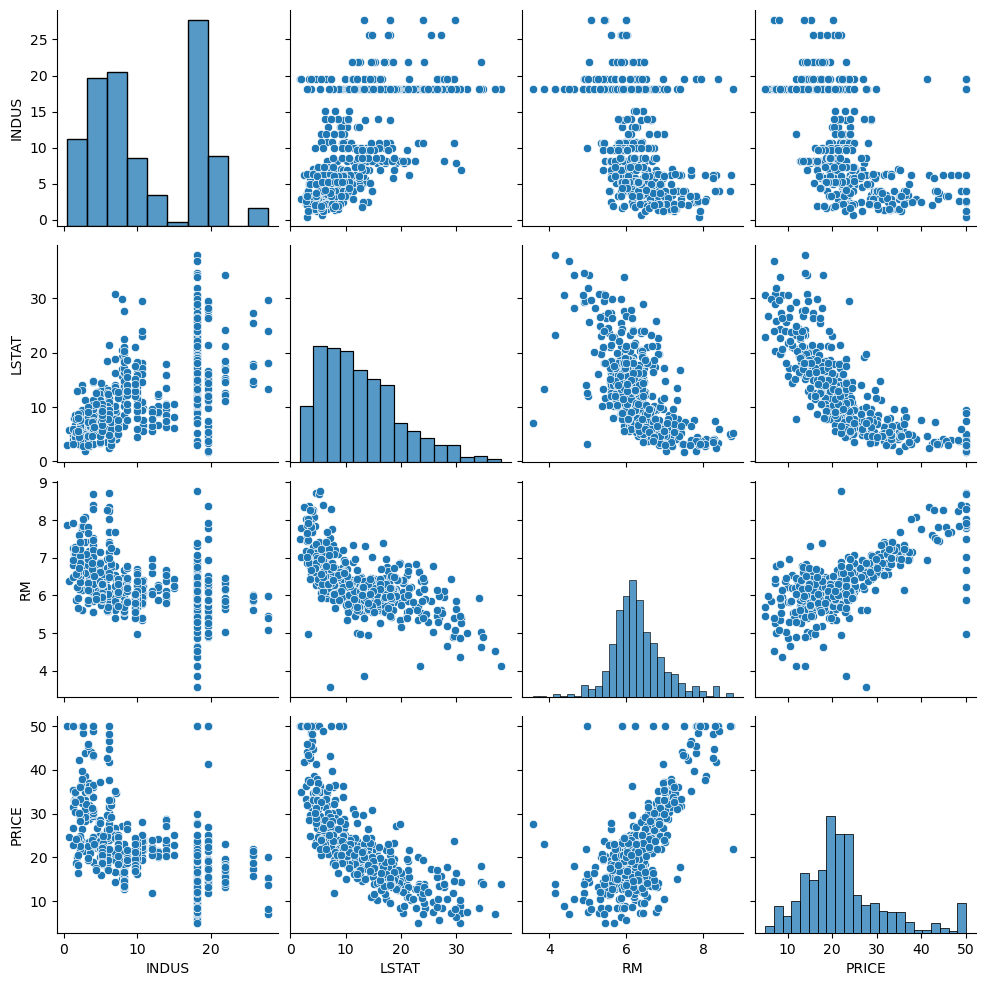

In [42]:
# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정
ccol = ['INDUS', 'LSTAT', 'RM', 'PRICE']

# pair plot 시각화
sns.pairplot(boston_df[ccol])

In [43]:
# 선택한 변수들의 상관 관계 확인
corrs = boston_df[ccol].corr()
corrs

,INDUS,LSTAT,RM,PRICE
INDUS,1.000000,0.603800,-0.391676,-0.483725
LSTAT,0.603800,1.000000,-0.613808,-0.737663
RM,-0.391676,-0.613808,1.000000,0.695360
PRICE,-0.483725,-0.737663,0.695360,1.000000


<Axes: >

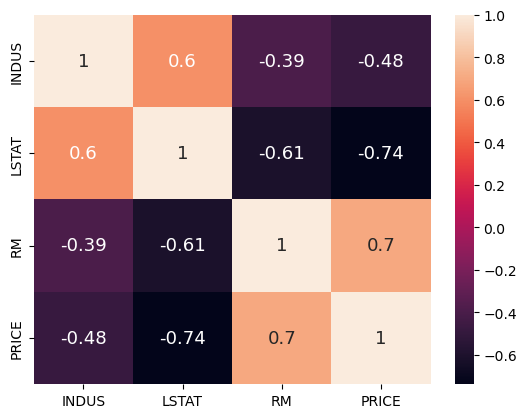

In [44]:
# 컬럼별로 독립변수 간의 관계에 대한 히트맵 그리기

sns.heatmap(corrs, annot=True, annot_kws={'size':13})

In [45]:
# 데이터 준비 : x, y 분할
from sklearn.model_selection import train_test_split

X=boston_df.drop(['PRICE'], axis=1)
y = boston_df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
# 데이터 일부 확인
X_train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13


In [47]:
# 모델 클래스 선택 및 구축
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [48]:
# 회귀 분석 모델 평가
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

y_pred = reg.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f"MSE : {mse:.3f}, RMSE : {rmse:.3f}")
print(f"R2 : {r2:.3f}")

MSE : 21.697, RMSE : 4.658
R2 : 0.709


In [49]:
# 수정 결정 계수 (Ajusted-r2)

# 데이터 크기
n= len(X_train)

# 독립변수의 갯수
k = len(X_train.columns)

# 수정된 결정 계수
adj_r2 = 1 - ((1-r2) * (n-1) / (n-k-1))

print(f"Adjusted R2 : {adj_r2:.3f}")

Adjusted R2 : 0.699


In [50]:
# 회귀 계수 확인 : 각각의 독립변수의 설명력 확인

#ndarray 의 실수를 부동 소수점으로 출력
np.set_printoptions(suppress=True)

# 회귀 계수와 절편 값 확인

print(f"Y 절편 : {reg.intercept_}")
print(f"회귀계수 : {np.round(reg.coef_, 3)}")

Y 절편 : 31.428479482301952
회귀계수 : [ -0.142   0.038   0.073 -14.901   4.146  -0.009  -1.418   0.277  -0.01
  -0.937   0.013  -0.566]


In [51]:
# 회귀 모델에서 구한 회귀 계수와 피처 이름을 묶어 시리즈 자료형으로 만듦

coef = pd.Series(data =np.round(reg.coef_, 3),\
    index = X.columns)

print(f"y = {str(reg.intercept_)} + ")

for i, c in zip(coef.index, coef.values):
    print(f"( {str(c)} ) * {str(i)}")

y = 31.428479482301952 + 
( -0.142 ) * CRIM
( 0.038 ) * ZN
( 0.073 ) * INDUS
( -14.901 ) * NOX
( 4.146 ) * RM
( -0.009 ) * AGE
( -1.418 ) * DIS
( 0.277 ) * RAD
( -0.01 ) * TAX
( -0.937 ) * PTRATIO
( 0.013 ) * B
( -0.566 ) * LSTAT


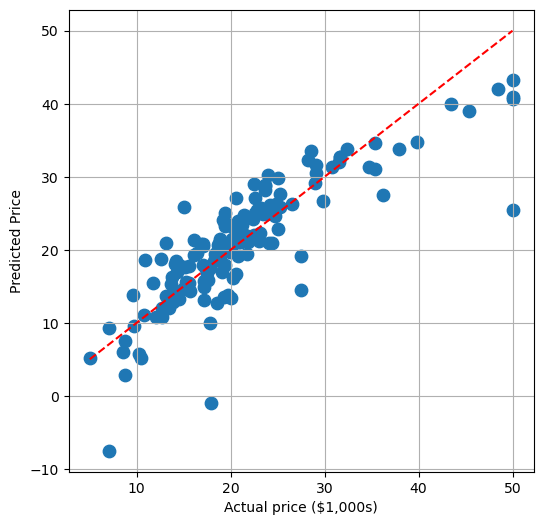

In [52]:
# 분석 결과 시각화 : 실제값 VS 예측값

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, s=80)
plt.plot([5, 50], [5, 50], c='r', ls='--')
plt.xlabel("Actual price ($1,000s)")
plt.ylabel("Predicted Price")
plt.grid()
plt.show()

In [53]:
# 스탯츠모델로 객체 생성, 학습 예측, 평가

# 최소 제곱법으로 객체 생성, 학습, 예측, 평가를 진행

import statsmodels.api as sm

# 훈련 데이터로 학습 수행
X_train = sm.add_constant(X_train)
reg = sm.OLS(y_train, X_train).fit()

# 검증 데이터로 예측 수행
X_test = sm.add_constant(X_test)
y_pred = reg.predict(X_test)

# 평가 지표 값 확인
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     79.49
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           4.52e-91
Time:                        20:56:35   Log-Likelihood:                -1058.4
No. Observations:                 354   AIC:                             2143.
Df Residuals:                     341   BIC:                             2193.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.4285      6.126      5.130      0.0